In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors, svm, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.feature_selection import RFE

/Users/vishalkumar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('autos.csv',encoding='cp1252')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [4]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [5]:
print(df.abtest.unique())

['test' 'control']


In [6]:
print(df.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [7]:
print(df.groupby('offerType').size())

offerType
Angebot    371516
Gesuch         12
dtype: int64


In [8]:
df.drop(['seller', 'offerType', 'abtest', 'nrOfPictures', 'dateCreated'], axis='columns', inplace=True)

In [9]:
print(df['price'].duplicated().describe())

count     371528
unique         2
top         True
freq      365931
Name: price, dtype: object


In [10]:
cars_frame = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration','gearbox','powerPS','model',
                                 'kilometer','monthOfRegistration','fuelType','notRepairedDamage'])

In [11]:
cars_frame = cars_frame[(cars_frame.yearOfRegistration <= 2016) & (cars_frame.yearOfRegistration >= 1950)
                    & (cars_frame.price >= 100) & (cars_frame.powerPS >= 10)]

In [12]:
print(100*cars_frame['name'].count()/df['name'].count())

82.1006761267


In [13]:
cars_frame.isnull().sum()

dateCrawled                0
name                       0
price                      0
vehicleType            10855
yearOfRegistration         0
gearbox                 5302
powerPS                    0
model                  11480
kilometer                  0
monthOfRegistration        0
fuelType               15494
brand                      0
notRepairedDamage      42281
postalCode                 0
lastSeen                   0
dtype: int64

In [14]:
cars_frame['notRepairedDamage'].fillna(value='not-declared', inplace=True)
cars_frame['fuelType'].fillna(value='not-declared', inplace=True)
cars_frame['gearbox'].fillna(value='not-declared', inplace=True)
cars_frame['vehicleType'].fillna(value='not-declared', inplace=True)
cars_frame['model'].fillna(value='not-declared', inplace=True)

In [15]:
cars_frame.isnull().sum()

dateCrawled            0
name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
lastSeen               0
dtype: int64

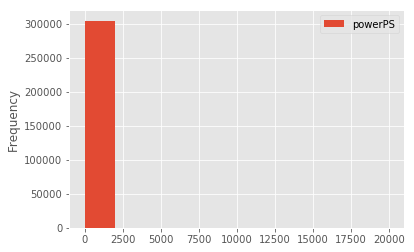

In [16]:
%matplotlib inline
cars_frame.plot(y='powerPS', kind='hist')

In [17]:
AgeCol=[]
from dateutil import parser

for date in cars_frame['lastSeen']:
    temp=parser.parse(date)
    AgeCol.append(temp.year)

cars_frame['Age']=AgeCol-cars_frame['yearOfRegistration']

cars_frame['Age'].describe()

cars_frame=cars_frame[(cars_frame['Age']>1)&(cars_frame['Age']<50)]
cars_frame.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,Age
count,2.952430e+05,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000
mean,1.709613e+04,2002.845084,130.305416,126382.318971,6.035334,51721.984027,13.154916
std,3.987959e+06,6.269060,192.031563,37945.215051,3.563040,25750.914605,6.269060
min,1.000000e+02,1967.000000,10.000000,5000.000000,0.000000,1067.000000,2.000000
25%,1.450000e+03,1999.000000,80.000000,100000.000000,3.000000,31234.000000,9.000000
50%,3.500000e+03,2003.000000,116.000000,150000.000000,6.000000,50859.000000,13.000000
75%,7.950000e+03,2007.000000,150.000000,150000.000000,9.000000,72525.000000,17.000000
max,2.147484e+09,2014.000000,20000.000000,150000.000000,12.000000,99998.000000,49.000000


In [18]:
Target_Labels = cars_frame['price']

for cols in cars_frame.columns:
    cars_frame[cols]=preprocessing.LabelEncoder().fit_transform(cars_frame[cols])

cars_frame.describe()

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen,Age
count,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000,295243.000000
mean,118428.275776,91331.463442,1415.529764,4.488313,35.845084,0.794898,116.923825,101.758958,10.548477,6.035334,1.962451,20.434208,1.040577,3687.466484,101230.752042,11.154916
std,68303.166164,53135.899081,1062.976988,1.791465,6.269060,0.441944,62.411300,71.287882,2.665597,3.563040,1.511016,13.432752,0.474279,2019.630095,46378.311537,6.269060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59224.500000,45284.000000,545.000000,4.000000,32.000000,1.000000,70.000000,40.000000,10.000000,3.000000,1.000000,9.000000,1.000000,2192.000000,62873.500000,7.000000
50%,118587.000000,90481.000000,1147.000000,5.000000,36.000000,1.000000,106.000000,99.000000,12.000000,6.000000,1.000000,23.000000,1.000000,3494.000000,124216.000000,11.000000
75%,177680.500000,136943.000000,2098.000000,6.000000,40.000000,1.000000,140.000000,162.000000,12.000000,9.000000,3.000000,33.000000,1.000000,5056.000000,139865.000000,15.000000
max,236218.000000,182651.000000,5122.000000,8.000000,47.000000,2.000000,732.000000,249.000000,12.000000,12.000000,7.000000,39.000000,2.000000,8114.000000,150084.000000,47.000000


In [19]:
X = cars_frame.drop(['price'],1)
Input = preprocessing.scale(X)

In [20]:
X_train, X_test, Z_train, Z_test=cross_validation.train_test_split(Input,Target_Labels,test_size=0.2)

In [21]:
# apply Linear Regression
Linear_Reg=LinearRegression()
Linear_Reg.fit(X_train,Z_train)
Linear_Reg.score(X_test,Z_test)

0.66106063951072214

In [22]:
#apply Random Forest
rf=RandomForestRegressor()
rf.fit(X_train,Z_train)
rf.score(X_test,Z_test)

0.91011475051576718

In [23]:
#We can Easily Drop some Columns because they not contributing too much to towards Accuracy

In [24]:
cars_frame=cars_frame.drop(['lastSeen','monthOfRegistration','dateCrawled','name','postalCode'],1)

In [25]:
X = cars_frame.drop(['price'],1)
Input = preprocessing.scale(X)
cols = cars_frame.columns

X_train, X_test, Z_train, Z_test=cross_validation.train_test_split(Input,Target_Labels,test_size=0.2)

rf.fit(X_train,Z_train)
rf.score(X_test,Z_test)

0.90703084220377206

In [26]:
print(rf.feature_importances_)
print(cols[1:])

[ 0.03337222  0.29908677  0.0053176   0.26170011  0.02716072  0.02403009
  0.00606185  0.0326446   0.01584444  0.2947816 ]
Index(['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')


In [27]:
selector = RFE(rf, 7, step=1) #Recursive Feature 
selector = selector.fit(X_train, Z_train)
selector.support_ 

array([ True,  True, False,  True,  True,  True, False,  True, False,  True], dtype=bool)

In [29]:
selector.ranking_

array([1, 1, 4, 1, 1, 1, 3, 1, 2, 1])

In [30]:
X.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,3,44,1,180,162,11,3,1,0,3
2,8,37,0,153,118,11,3,14,2,10
3,4,34,1,65,117,12,1,38,1,13
4,4,41,1,59,102,9,3,31,1,6
5,6,28,1,92,11,12,1,2,0,19


In [32]:
X=cars_frame[['vehicleType','yearOfRegistration','powerPS','model','kilometer','brand','Age']]
X.head()

,vehicleType,yearOfRegistration,powerPS,model,kilometer,brand,Age
1,3,44,180,162,11,1,3
2,8,37,153,118,11,14,10
3,4,34,65,117,12,38,13
4,4,41,59,102,9,31,6
5,6,28,92,11,12,2,19


In [33]:
Input = preprocessing.scale(X)
cols = cars_frame.columns
X_train, X_test, Z_train, Z_test=cross_validation.train_test_split(Input,Target_Labels,test_size=0.2)
rf.fit(X_train,Z_train)
rf.score(X_test,Z_test)

0.90132373746602223

In [35]:
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
price,1.000000,0.002539,0.585142,-0.324791,0.584823,-0.022703,-0.417055,0.101265,-0.128459,0.014504,-0.585142
vehicleType,0.002539,1.000000,0.002849,-0.106058,0.120888,-0.146510,0.038787,0.061937,-0.111259,0.013928,-0.002849
yearOfRegistration,0.585142,0.002849,1.000000,-0.114154,0.204485,0.036086,-0.337254,0.108331,-0.054313,-0.037573,-1.000000
gearbox,-0.324791,-0.106058,-0.114154,1.000000,-0.432371,0.047687,0.024568,-0.066823,0.125323,0.034082,0.114154
powerPS,0.584823,0.120888,0.204485,-0.432371,1.000000,-0.127254,-0.012088,0.095142,-0.298663,-0.015633,-0.204485
model,-0.022703,-0.146510,0.036086,0.047687,-0.127254,1.000000,-0.020525,0.046230,0.474290,0.016095,-0.036086
kilometer,-0.417055,0.038787,-0.337254,0.024568,-0.012088,-0.020525,1.000000,0.102186,-0.029201,-0.002386,0.337254
fuelType,0.101265,0.061937,0.108331,-0.066823,0.095142,0.046230,0.102186,1.000000,-0.027156,0.056530,-0.108331
brand,-0.128459,-0.111259,-0.054313,0.125323,-0.298663,0.474290,-0.029201,-0.027156,1.000000,0.013941,0.054313
notRepairedDamage,0.014504,0.013928,-0.037573,0.034082,-0.015633,0.016095,-0.002386,0.056530,0.013941,1.000000,0.037573


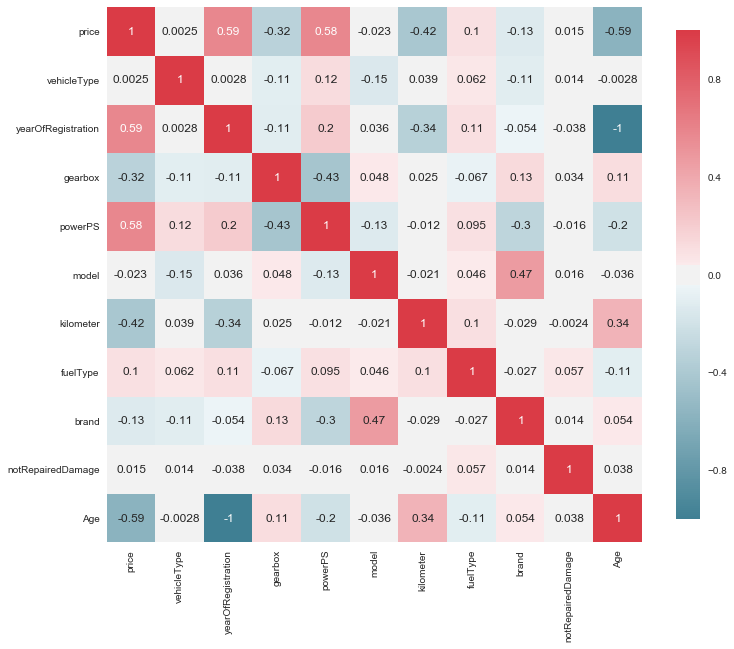

In [38]:
plot_correlation_map(cars_frame)
cars_frame.corr()

In [39]:
plt.show()